# Language Models

In [1]:
Names = ['Tokenization',
         'Part-of-Speech (POS) Tagging', 
         'Dependency Parsing', 
         'Lemmatization', 
         'Named Entity Recognition (NER)', 
         'Similarity', 
         'Text Classification']
Descriptions = ['Labelling named “real-world” objects, like persons, companies or locations.', 
               'Assigning word types to tokens, like verb or noun.',
               'Segmenting text into words, punctuations marks etc.', 
               'Assigning categories or labels to a whole document, or parts of a document.',
               'Assigning syntactic dependency labels, describing the relations between individual tokens, like subject or object.', 
               'Comparing words or documents and how similar they are to each other.', 
               'Assigning the base forms of words. For example, the lemma of “was” is “be”, and the lemma of “rats” is “rat”.']


# SpaCy
`https://spacy.io/usage/spacy-101`

In [ ]:
#! pip install spacy

In [ ]:
# !python -m spacy download en_core_web_md 

# This will download the medium-sized model (44MB)
# if you'd rather use a smaller one (13MB, but without word vecotrs): run this instead: 
# ! python -m spacy download en_core_web_sm

In [2]:
import spacy

In [4]:
nlp = spacy.load('en_core_web_md')  #also load the model

In [5]:
text_original = """Super trouper beams are gonna blind me
        But I won't feel blue
        Like I always do
        'Cause somewhere in the crowd there's you
        I was sick and tired of everything
        When I called you last night from Glasgow
        All I do is eat and sleep and sing
        Wishing every show was the last show 
        (wishing every show was the last show)
        So imagine I was glad to hear you're coming 
        (glad to hear you're coming)
        Suddenly I feel all right
        (And suddenly it's gonna be)
        And it's gonna be so different
        When I'm on the stage tonight"""

In [9]:
text = nlp(text_original)

In [10]:
type(text)

spacy.tokens.doc.Doc

In [11]:
for token in text:
    print(token)

Super
trouper
beams
are
gon
na
blind
me

        
But
I
wo
n't
feel
blue

        
Like
I
always
do

        
'Cause
somewhere
in
the
crowd
there
's
you

        
I
was
sick
and
tired
of
everything

        
When
I
called
you
last
night
from
Glasgow

        
All
I
do
is
eat
and
sleep
and
sing

        
Wishing
every
show
was
the
last
show

        
(
wishing
every
show
was
the
last
show
)

        
So
imagine
I
was
glad
to
hear
you
're
coming

        
(
glad
to
hear
you
're
coming
)

        
Suddenly
I
feel
all
right

        
(
And
suddenly
it
's
gon
na
be
)

        
And
it
's
gon
na
be
so
different

        
When
I
'm
on
the
stage
tonight


## Linguistic Features

In [ ]:
# Tokenization, stop words

**create own list of stopwords**: https://github.com/explosion/spaCy/blob/master/spacy/lang/en/stop_words.py

In [ ]:
# Lemmatization

In [3]:
def spacy_cleaner(document):
    tokenize_doc = nlp(document)
    new_doc = []
    for token in tokenize_doc:
        if not token.is_stop and token.is_alpha:
            new_doc.append(token.lemma_)
    return new_doc

In [ ]:
# POS-tagging

In [ ]:
# NER

In [14]:
text2 = nlp("My name is Ada Lovelace, I am in New York until Christmas and work at Google since May 2020.")

In [15]:
spacy.displacy.render(text2, style='ent')

In [ ]:
# Dependencies

In [16]:
spacy.displacy.render(text2, style='dep')

In [ ]:
from dframcy import DframCy

# nlp = spacy.load('en_core_web_sm')
dframcy = DframCy(nlp)
doc = dframcy.nlp(u'Apple is looking at buying U.K. startup for $1 billion')
annotation_dataframe = dframcy.to_dataframe(doc)

# Word embeddings

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
things = pd.DataFrame({'size': [60, 65, 15, 90, 92, 45, 70, 50, 21],
                      'roundness': [76, 11, 94, 99, 96, 8, 18, 15, 56]}, 
                       index=['Apple', 'Banana', 'Blueberry', 
                              'Melon', 'Football', 'Pen', 'Shoe', 'Spoon', 'Dice'])
things

,size,roundness
Apple,60,76
Banana,65,11
Blueberry,15,94
Melon,90,99
Football,92,96
Pen,45,8
Shoe,70,18
Spoon,50,15
Dice,21,56


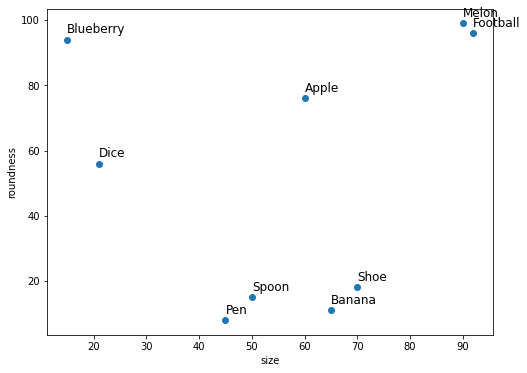

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(things['size'], things['roundness'])
plt.xlabel('size'), plt.ylabel('roundness')
for i, txt in enumerate(things.index):
    plt.annotate(txt, (things.iloc[i][0], things.iloc[i][1]+2), fontsize=12)

# Word vectors in Spacy
Spacy can compare two word(vector)s regarding how similar they are. For this, you need a model of at least medium size, e.g. `en_core_web_md`. 

In [ ]:
nlp('cat').vector

In [18]:
word1 = nlp('baboon')

In [19]:
word2 = nlp('man')

In [20]:
word1.similarity(word2)

0.40534208784656045

In [21]:
rte = nlp('erdogan')
dic = nlp('dictator')
rte.similarity(dic)

0.28980141256788733

In [ ]:
# from dframcy import DframCy

# nlp = spacy.load('en_core_web_sm')
# dframcy = DframCy(nlp)

# doc = dframcy.nlp(u'Apple is looking at buying U.K. startup for $1 billion')
# annotation_dataframe = dframcy.to_dataframe(doc)